# Wind, Solar and Nuclear Energy Production

In [1]:
#Required imports for the analysis
import numpy as np
import pandas as pd 
from pandas import DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams["patch.force_edgecolor"]= True
df = pd.read_csv("C:/Users/chava/Desktop/SustainablePowerGen/all_energy_statistics.csv")


**1.Understanding the dataset**

In [2]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
df.tail()


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity
1189481,Viet Nam,Electricity - total wind production,2008,"Kilowatt-hours, million",1.0,NaN,wind_electricity


In [4]:
#Find more information about the shape, features and unique values
print("Number of rows and columns are:", df.shape)
print("List of countries and Area are: {}".format(df.country_or_area.unique()))

Number of rows and columns are: (1189482, 7)
List of countries and Area are: ['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'A

In [5]:
print("Number of rows and columns are:", df.describe(include=['object']))

Number of rows and columns are:        country_or_area                   commodity_transaction  \
count          1189482                                 1189482   
unique             243                                    2452   
top            Germany  From combustible fuels – Main activity   
freq             20422                                    6601   

                          unit           category  
count                  1189482            1189482  
unique                       6                 71  
top     Metric tons,  thousand  total_electricity  
freq                    759859             133916  


In [6]:
df[df.country_or_area.str.contains("United States")]

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
128,United States,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",2484.0,NaN,additives_and_oxygenates
129,United States,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",2640.0,NaN,additives_and_oxygenates
130,United States,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",2579.0,NaN,additives_and_oxygenates
131,United States,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",2506.0,NaN,additives_and_oxygenates
132,United States,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",2497.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189456,United States,Electricity - total wind production,1994,"Kilowatt-hours, million",3483.0,NaN,wind_electricity
1189457,United States,Electricity - total wind production,1993,"Kilowatt-hours, million",3053.0,NaN,wind_electricity
1189458,United States,Electricity - total wind production,1992,"Kilowatt-hours, million",2917.0,NaN,wind_electricity
1189459,United States,Electricity - total wind production,1991,"Kilowatt-hours, million",3051.0,NaN,wind_electricity


**2.Data Wrangling**

In [7]:
#List of countries to work on.
USA = df[df.country_or_area.isin(["United States"])].sort_values('year')
BRZ= df[df.country_or_area.isin(['Brazil'])].sort_values('year')
CAN = df[df.country_or_area.isin(["Canada"])].sort_values('year')
CHI = df[df.country_or_area.isin(["China"])].sort_values('year')
IND = df[df.country_or_area.isin(['India'])].sort_values('year')
JAP = df[df.country_or_area.isin(['Japan'])].sort_values('year')
UK =df[df.country_or_area.isin(['United Kingdom'])].sort_values('year')
#European Union List.
SP = df[df.country_or_area.isin(["Spain"])].sort_values('year')
ITA = df[df.country_or_area.isin(['Italy'])].sort_values('year')
GER = df[df.country_or_area.isin(["Germany"])].sort_values('year')
FRC = df[df.country_or_area.isin(["France"])].sort_values('year')
NETHR = df[df.country_or_area.isin(['Netherlands'])].sort_values('year')

In [8]:
USA_Wind = USA[USA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
BRZ_Wind = BRZ[BRZ.commodity_transaction == "Electricity - total wind production"].sort_values("year")
CAN_Wind = CAN[CAN.commodity_transaction == "Electricity - total wind production"].sort_values("year")
CHI_Wind = CHI[CHI.commodity_transaction == "Electricity - total wind production"].sort_values("year")
IND_Wind = IND[IND.commodity_transaction == "Electricity - total wind production"].sort_values("year")
JAP_Wind = JAP[JAP.commodity_transaction == "Electricity - total wind production"].sort_values("year")
UK_Wind = UK[UK.commodity_transaction == "Electricity - total wind production"].sort_values("year")
#European Union
SP_Wind = SP[SP.commodity_transaction == "Electricity - total wind production"].sort_values("year")
ITA_Wind = ITA[ITA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
FRC_Wind = FRC[FRC.commodity_transaction == "Electricity - total wind production"].sort_values("year")
GER_Wind = GER[GER.commodity_transaction == "Electricity - total wind production"].sort_values("year")
NETHR_Wind = NETHR[NETHR.commodity_transaction == "Electricity - total wind production"].sort_values("year")

In [9]:
#Creating the European Union based on Wind Production, merging done on year, 
EU_Wind = pd.merge(SP_Wind,ITA_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area_x':'Spain',
                        'commodity_transaction_x':
                   'commodity1','unit_x':'unit1',
                        'quantity_x':'quantity1',
                   'country_or_area_y':'Italy',
                        'quantity_y':'quantity2'}, inplace=True)

EU_Wind.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)

In [10]:
#Adding France.
EU_Wind = EU_Wind.merge(FRC_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'France','quantity':'quantity3',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)


In [11]:
#Adding Germany.
EU_Wind = EU_Wind.merge(GER_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'Germany','quantity':'quantity4',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)
             


In [12]:
#Adding Netherlands.
EU_Wind = EU_Wind.merge(NETHR_Wind,on='year',how='outer')
EU_Wind.rename(columns={'country_or_area':'Netherlands','quantity':'quantity5',},inplace=True)
EU_Wind.drop(['commodity_transaction','unit','category'], axis=1,inplace=True) 


In [13]:
EU_Wind.drop(['quantity_footnotes_x','quantity_footnotes_y','quantity_footnotes'],axis=1, inplace=True)

In [14]:
# Filling all the NaN values.
values = {'France':'France','quantity3':0,'Germany':'Germany',
           'quantity4':0,'Netherlands':'Netherlands','quantity5':0}

# Adding all columns to create total quantity for the countries that would represent European Union
EU_Wind.fillna(value=values,inplace=True)

In [15]:
#create one European quantity by adding all the quantities
EU_Wind['quantity'] = EU_Wind['quantity1'] + EU_Wind['quantity2'] + EU_Wind['quantity3'] 
+ EU_Wind['quantity4'] + EU_Wind['quantity5']

0        56.0
1       303.0
2       438.0
3       848.0
4      1666.0
5      2029.0
6      2515.0
7      3509.0
8      5233.0
9      6173.0
10    10181.0
11    11281.0
12    16803.0
13    20033.0
14    27380.0
15    29296.0
16    33445.0
17    43151.0
18    44834.0
19    43228.0
20    41787.0
21    53984.0
22    55651.0
23    57335.0
24    63154.0
dtype: float64

In [16]:
EU_Wind.head()

,Spain,commodity1,year,unit1,quantity1,category_x,Italy,quantity2,France,quantity3,Germany,quantity4,Netherlands,quantity5,quantity
0,Spain,Electricity - total wind production,1990,"Kilowatt-hours, million",14.0,wind_electricity,Italy,2.0,France,0.0,Germany,0.0,Netherlands,56.0,16.0
1,Spain,Electricity - total wind production,1991,"Kilowatt-hours, million",15.0,wind_electricity,Italy,3.0,France,0.0,Germany,215.0,Netherlands,88.0,18.0
2,Spain,Electricity - total wind production,1992,"Kilowatt-hours, million",103.0,wind_electricity,Italy,2.0,France,0.0,Germany,291.0,Netherlands,147.0,105.0
3,Spain,Electricity - total wind production,1993,"Kilowatt-hours, million",116.0,wind_electricity,Italy,4.0,France,2.0,Germany,674.0,Netherlands,174.0,122.0
4,Spain,Electricity - total wind production,1994,"Kilowatt-hours, million",175.0,wind_electricity,Italy,7.0,France,5.0,Germany,1428.0,Netherlands,238.0,187.0


##### Creating a new dataframe with are all the countries related to Solar Production, also creating the European Union like earlier.

In [20]:
#List of countries to work on.
USA_Solar = USA[USA.commodity_transaction == "Electricity - total solar production"].sort_values("year")
BRZ_Solar = BRZ[BRZ.commodity_transaction == "Electricity - total solar production"].sort_values("year")
CAN_Solar = CAN[CAN.commodity_transaction == "Electricity - total solar production"].sort_values("year")
CHI_Solar = CHI[CHI.commodity_transaction == "Electricity - total solar production"].sort_values("year")
IND_Solar = IND[IND.commodity_transaction == "Electricity - total solar production"].sort_values("year")
JAP_Solar = JAP[JAP.commodity_transaction == "Electricity - total solar production"].sort_values("year")
UK_Solar = UK[UK.commodity_transaction == "Electricity - total solar production"].sort_values("year")
#European Union.
SP_Solar = SP[SP.commodity_transaction == "Electricity - total solar production"].sort_values("year")
ITA_Solar = ITA[ITA.commodity_transaction == "Electricity - total wind production"].sort_values("year")
FRC_Solar = FRC[FRC.commodity_transaction == "Electricity - total solar production"].sort_values("year")
GER_Solar = GER[GER.commodity_transaction == "Electricity - total solar production"].sort_values("year")
NETHR_Solar = NETHR[NETHR.commodity_transaction == "Electricity - total solar production"].sort_values("year")

In [19]:
EU_Solar = pd.merge(SP_Solar,ITA_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area_x':'Spain','commodity_transaction_x':
                   'commodity1','unit_x':'unit1','quantity_x':'quantity1',
                   'country_or_area_y':'Italy','quantity_y':'quantity2'},inplace=True)

EU_Solar.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)

In [22]:
#Adding France.
EU_Solar = EU_Solar.merge(FRC_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'France','quantity':'quantity3',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

In [23]:
#Adding Germany.
EU_Solar = EU_Solar.merge(GER_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'Germany','quantity':'quantity4',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

In [24]:
#Adding Netherlands.
EU_Solar = EU_Solar.merge(NETHR_Solar,on='year',how='outer')
EU_Solar.rename(columns={'country_or_area':'Netherlands','quantity':'quantity5',},inplace=True)
EU_Solar.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)

In [25]:
#Here I would drop some columns I dont need
EU_Solar.drop(["quantity_footnotes_x","quantity_footnotes_y","quantity_footnotes"],axis=1, inplace=True) 

In [26]:
#filling all the NaN values.
values = {'France':'France','quantity3':0,'Germany':'Germany',
           'quantity4':0,'Netherlands':'Netherlands','quantity5':0}

EU_Solar.fillna(value=values,inplace=True)

In [29]:
#create one European quantity by adding all the quantities
EU_Solar['quantity'] = EU_Solar['quantity1'] + EU_Solar['quantity2'] + EU_Solar['quantity3'] 
+ EU_Solar['quantity4'] + EU_Solar['quantity5']

0         0.0
1         2.0
2         5.0
3         4.0
4         8.0
5         9.0
6        14.0
7        21.0
8        39.0
9        35.0
10       68.0
11      128.0
12      205.0
13      339.0
14      591.0
15     1317.0
16     2256.0
17     3112.0
18     4459.0
19     6629.0
20    11785.0
21    19703.0
22    26606.0
23    31497.0
24    36841.0
dtype: float64

In [30]:
EU_Solar.head()  

,Spain,commodity1,year,unit1,quantity1,category_x,Italy,quantity2,France,quantity3,Germany,quantity4,Netherlands,quantity5,quantity
0,Spain,Electricity - total solar production,1990,"Kilowatt-hours, million",6.0,solar_electricity,Italy,2.0,France,0.0,Germany,0.0,Netherlands,0.0,8.0
1,Spain,Electricity - total solar production,1991,"Kilowatt-hours, million",7.0,solar_electricity,Italy,3.0,France,0.0,Germany,1.0,Netherlands,1.0,10.0
2,Spain,Electricity - total solar production,1992,"Kilowatt-hours, million",8.0,solar_electricity,Italy,2.0,France,0.0,Germany,4.0,Netherlands,1.0,10.0
3,Spain,Electricity - total solar production,1993,"Kilowatt-hours, million",9.0,solar_electricity,Italy,4.0,France,0.0,Germany,3.0,Netherlands,1.0,13.0
4,Spain,Electricity - total solar production,1994,"Kilowatt-hours, million",10.0,solar_electricity,Italy,7.0,France,1.0,Germany,7.0,Netherlands,1.0,18.0


##### Creating a new dataframe with are all the countries related to Nuclear Production, also creating the European Union like earlier.

In [31]:
#List of countries to work on with Nuclear production.
USA_Nuclear = USA[USA.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
BRZ_Nuclear = BRZ[BRZ.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
CAN_Nuclear = CAN[CAN.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
CHI_Nuclear = CHI[CHI.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
IND_Nuclear = IND[IND.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
JAP_Nuclear = JAP[JAP.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
UK_Nuclear = UK[UK.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")

#European Union. Italy do not have nuclear power"
SP_Nuclear = SP[SP.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
FRC_Nuclear = FRC[FRC.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
GER_Nuclear = GER[GER.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")
NETHR_Nuclear = NETHR[NETHR.commodity_transaction == "Electricity - total nuclear production"].sort_values("year")



In [32]:
#creating the European Union based on Nuclear Production
EU_Nuclear = pd.merge(SP_Nuclear,FRC_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area_x':'Spain','commodity_transaction_x':
                   'commodity1','unit_x':'unit1','quantity_x':'quantity1',
                   'country_or_area_y':'France','quantity_y':'quantity2'},inplace=True)

EU_Nuclear.drop(['commodity_transaction_y','unit_y','category_y'], axis=1,inplace=True)


In [33]:
#Adding Germany
EU_Nuclear = EU_Nuclear.merge(GER_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area':'Germany','quantity':'quantity3',},inplace=True)
EU_Nuclear.drop(['commodity_transaction','unit','category'], axis=1,inplace=True)


In [34]:
#Adding Netherlands
EU_Nuclear = EU_Nuclear.merge(NETHR_Nuclear,on='year',how='outer')
EU_Nuclear.rename(columns={'country_or_area':'Netherlands','quantity':'quantity4',},inplace=True)
EU_Nuclear.drop(['commodity_transaction','unit','category'], axis=1, inplace=True)

In [ ]:
#EU_Nuclear.drop(["quantity_footnotes_x","quantity_footnotes_y","quantity_footnotes","..."],axis=1, inplace=True) 

In [36]:
#filling all the NaN values.
values = {'Germany':'Germany','quantity3':0}
EU_Nuclear.fillna(value=values,inplace=True)

C:\Users\chava\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [38]:
EU_Nuclear['quantity'] = EU_Nuclear['quantity1'] + EU_Nuclear['quantity2'] 
+ EU_Nuclear['quantity3'] + EU_Nuclear['quantity4'] 

In [39]:
EU_Nuclear.head()  

,Spain,commodity1,year,unit1,quantity1,quantity_footnotes_x,category_x,France,quantity2,quantity_footnotes_y,Germany,quantity3,quantity_footnotes_x,Netherlands,quantity4,quantity_footnotes_y,quantity
0,Spain,Electricity - total nuclear production,1990,"Kilowatt-hours, million",54268.0,NaN,nuclear_electricity,France,314081.0,NaN,NaN,NaN,NaN,Netherlands,3502.0,NaN,NaN
1,Spain,Electricity - total nuclear production,1991,"Kilowatt-hours, million",55578.0,NaN,nuclear_electricity,France,331340.0,NaN,Germany,147229.0,NaN,Netherlands,3329.0,NaN,537476.0
2,Spain,Electricity - total nuclear production,1992,"Kilowatt-hours, million",55782.0,NaN,nuclear_electricity,France,338445.0,NaN,Germany,158804.0,NaN,Netherlands,3800.0,NaN,556831.0
3,Spain,Electricity - total nuclear production,1993,"Kilowatt-hours, million",56060.0,NaN,nuclear_electricity,France,368188.0,NaN,Germany,153276.0,NaN,Netherlands,3948.0,NaN,581472.0
4,Spain,Electricity - total nuclear production,1994,"Kilowatt-hours, million",55313.0,NaN,nuclear_electricity,France,359981.0,NaN,Germany,150703.0,NaN,Netherlands,3967.0,NaN,569964.0


**3.Visualizing the data**

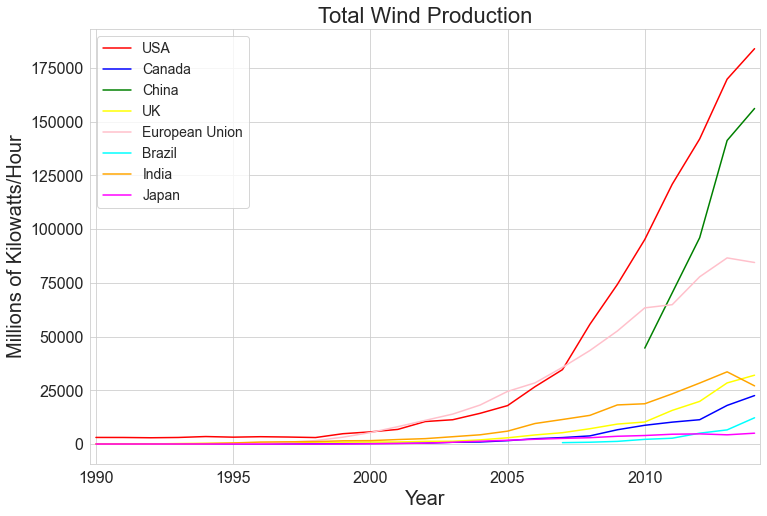

In [83]:
#This is for the wind Production
#Assigning x and y values to different countries and finding the wind production of these countries.
y1 = USA_Wind.quantity
x1 = USA_Wind.year
y2 = CAN_Wind.quantity
x2 = CAN_Wind.year
y3 = CHI_Wind.quantity
x3 = CHI_Wind.year
x4 = UK_Wind.year
y4 = UK_Wind.quantity
x5 = EU_Wind.year
y5 = EU_Wind.quantity
x6 = BRZ_Wind.year
y6 = BRZ_Wind.quantity
x7 = IND_Wind.year
y7 = IND_Wind.quantity
x8 = JAP_Wind.year
y8 = JAP_Wind.quantity


plt.figure(figsize=(12,8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(x1,y1,'red',label="USA")
plt.plot(x2,y2,'blue',label="Canada")
plt.plot(x3,y3,'green',label="China")
plt.plot(x4,y4,'yellow',label="UK")
plt.plot(x5,y5,'pink',label="European Union")
plt.plot(x6,y6,'cyan',label="Brazil")
plt.plot(x7,y7,'orange',label="India")
plt.plot(x8,y8,'magenta',label="Japan")




plt.legend(fontsize=14)
plt.ylabel("Millions of Kilowatts/Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production',fontsize=22)
plt.xlim(1989.8, 2014.2)
plt.show()

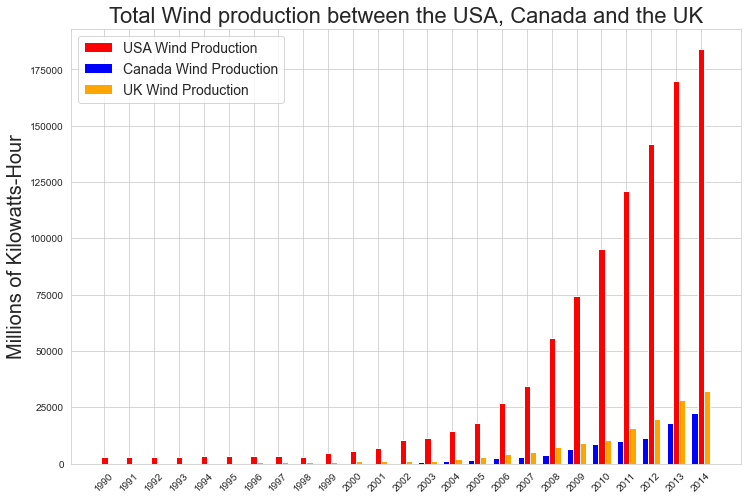

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(USA_Wind["year"], USA_Wind["quantity"], width, color='Red')
rects2 = ax.bar(CAN_Wind["year"] + width -0.5, CAN_Wind["quantity"], width, color='Blue')
rects3 = ax.bar(UK_Wind["year"] + width, UK_Wind["quantity"], width, color='Orange')

ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind production between the USA, Canada and the UK",fontsize=22)
ax.set_xticks(USA_Wind["year"])
ax.set_xticklabels(USA_Wind["year"], rotation=45)

ax.legend((rects1[0], rects2[0],rects3[0]), ('USA Wind Production', 'Canada Wind Production',
                                             'UK Wind Production' ), fontsize=14)

plt.show()

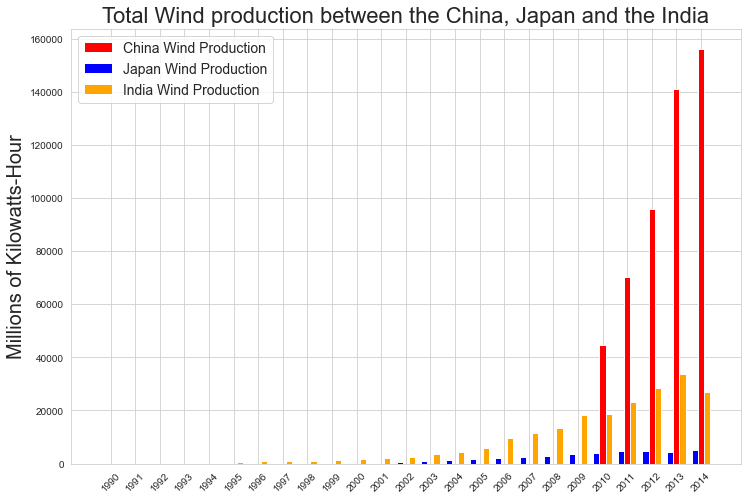

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(CHI_Wind["year"], CHI_Wind["quantity"], width, color='Red')
rects2 = ax.bar(JAP_Wind["year"] + width -0.5, JAP_Wind["quantity"], width, color='Blue')
rects3 = ax.bar(IND_Wind["year"] + width, IND_Wind["quantity"], width, color='Orange')

ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind production between the China, Japan and the India",fontsize=22)
ax.set_xticks(USA_Wind["year"])
ax.set_xticklabels(USA_Wind["year"], rotation=45)

ax.legend((rects1[0], rects2[0],rects3[0]), ('China Wind Production', 'Japan Wind Production',
                                             'India Wind Production' ), fontsize=14)

plt.show()

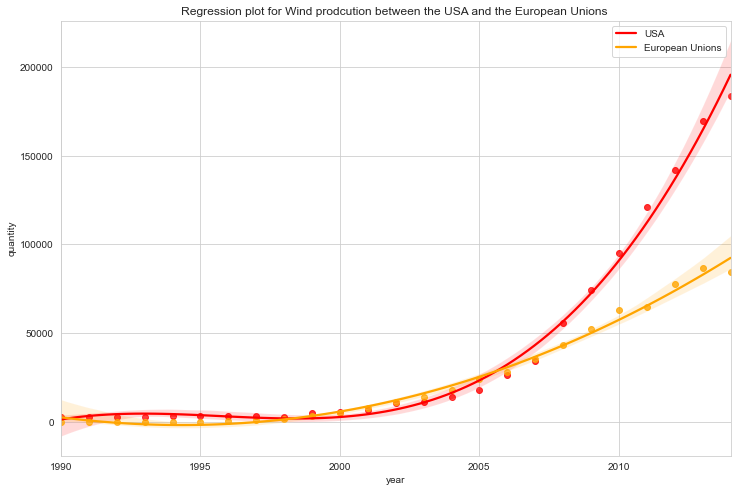

In [84]:
#Regression plot between USA and European union
plt.figure(figsize=(12,8))
sns.regplot(x1,y1, order=3, color='red')
sns.regplot(x5,y5, order=3, color='orange')
plt.legend(labels=["USA", "European Unions"])
plt.title("Regression plot for Wind prodcution between the USA and the European Unions ")
plt.show()

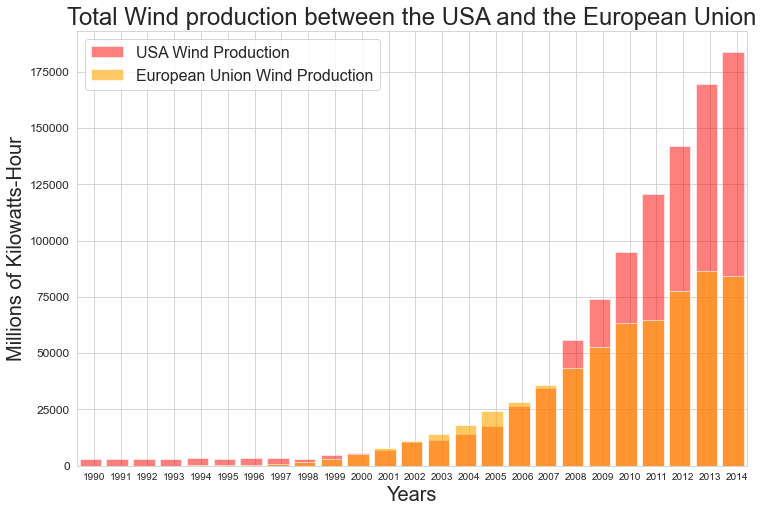

In [85]:
#Energy production in USA by Wind, Solar and Nuclear 

bar_width =.8
plt.figure(figsize=(12,8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
x = np.arange(len(USA_Wind["year"]))
plt.bar(x, USA_Wind["quantity"],bar_width, color='Red',capstyle= 'projecting', label="USA Wind Production", alpha=.5)
plt.bar(x , EU_Wind["quantity"],bar_width, color='Orange', label="European Union Wind Production", alpha=.6)


plt.legend(fontsize=16)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Millions of Kilowatts-Hour", fontsize=20)
plt.title("Total Wind production between the USA and the European Union", fontsize=24)
plt.xticks(x + bar_width / 6, USA_Wind["year"])
plt.xlim(-.5,24.5)
plt.show()


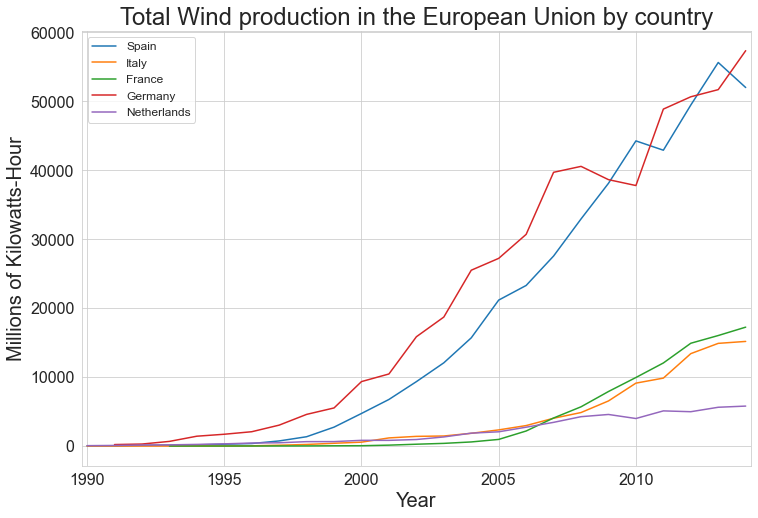

In [86]:
#Wind Energy Production in European Union
plt.figure(figsize=(12,8))
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.plot(SP_Wind["year"],SP_Wind["quantity"],label="Spain")
plt.plot(ITA_Wind["year"],ITA_Wind["quantity"],label="Italy")
plt.plot(FRC_Wind["year"],FRC_Wind["quantity"],label="France")
plt.plot(GER_Wind["year"],GER_Wind["quantity"],label="Germany")
plt.plot(NETHR_Wind["year"],NETHR_Wind["quantity"],label="Netherlands")



plt.legend(fontsize=12)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind production in the European Union by country',fontsize=24)
plt.xlim(1989.8, 2014.2)
plt.show()


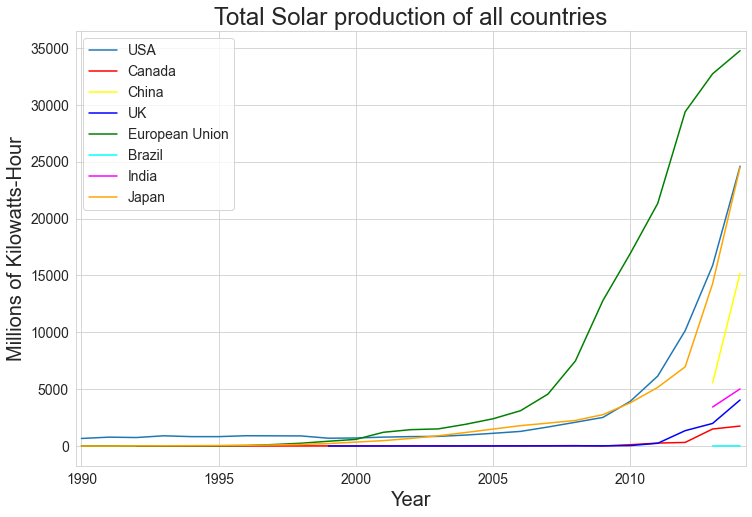

In [89]:
#This is for the Solar Production
#Assigning x and y values to different countries and finding the Solar production of these countries.
y1b = USA_Solar.quantity
x1b = USA_Solar.year
y2b = CAN_Solar.quantity
x2b = CAN_Solar.year
y3b = CHI_Solar.quantity
x3b = CHI_Solar.year
x4b = UK_Solar.year
y4b = UK_Solar.quantity
x5b = EU_Solar.year
y5b = EU_Solar.quantity
x6b = BRZ_Solar.year
y6b = BRZ_Solar.quantity
x7b = IND_Solar.year
y7b = IND_Solar.quantity
x8b = JAP_Solar.year
y8b = JAP_Solar.quantity


plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(x1b,y1b,label="USA")
plt.plot(x2b,y2b,'red',label="Canada")
plt.plot(x3b,y3b,'yellow',label="China")
plt.plot(x4b,y4b,'blue',label="UK")
plt.plot(x5b,y5b,'green',label="European Union")
plt.plot(x6b,y6b,'cyan',label="Brazil")
plt.plot(x7b,y7b,'magenta',label="India")
plt.plot(x8b,y8b,'orange',label="Japan")




plt.legend(fontsize=14)
plt.ylabel("Millions of Kilowatts-Hour",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Total Solar production of all countries',fontsize=24)
plt.xlim(1989.8, 2014.2)
plt.show()


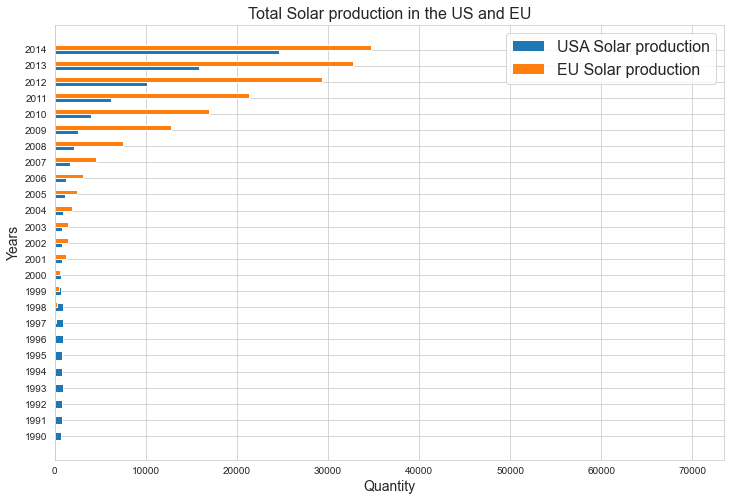

In [93]:
br= .5
plt.figure(figsize=(12,8))
plt.barh(USA_Solar["year"],USA_Solar["quantity"],height = br , label="USA Solar production")
plt.barh(EU_Solar["year"] , EU_Solar["quantity"],align ='edge', height=br-.2, label="EU Solar production" )
plt.yticks(EU_Solar["year"])

plt.legend(fontsize=16)
plt.ylabel("Years", fontsize=14)
plt.xlabel("Quantity", fontsize=14)
plt.title("Total Solar production in the US and EU", fontsize=16)
plt.xlim(0, 73500)
plt.show()